# Classic Iris classification

#### Imports

In [23]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
import itertools

In [24]:
#load the iris dataset
iris_dataset = load_iris()
#display the keys of the iris dataset
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [25]:
#description of the dataset
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

##### Exploring the data

The target values are : 0 for setosa, 1 for versicolor and 2 for virginica (integers)
<br>There are 4 features: sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)

In [26]:
#display the target names
print(f"Target names: {iris_dataset['target_names']}")
#display the feature names
print(f"Feature names:{iris_dataset['feature_names']}")
#display the type of data
print(f"Type of data: {type(iris_dataset['data'])}")
#display the shape of the data
print(f"Shape of data: {iris_dataset['data'].shape}")
#first five rows of the data
print(f"First five rows of data:\n{iris_dataset['data'][:5]}")

Target names: ['setosa' 'versicolor' 'virginica']
Feature names:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)
First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


#### Plot features vs Species in Scatter plot

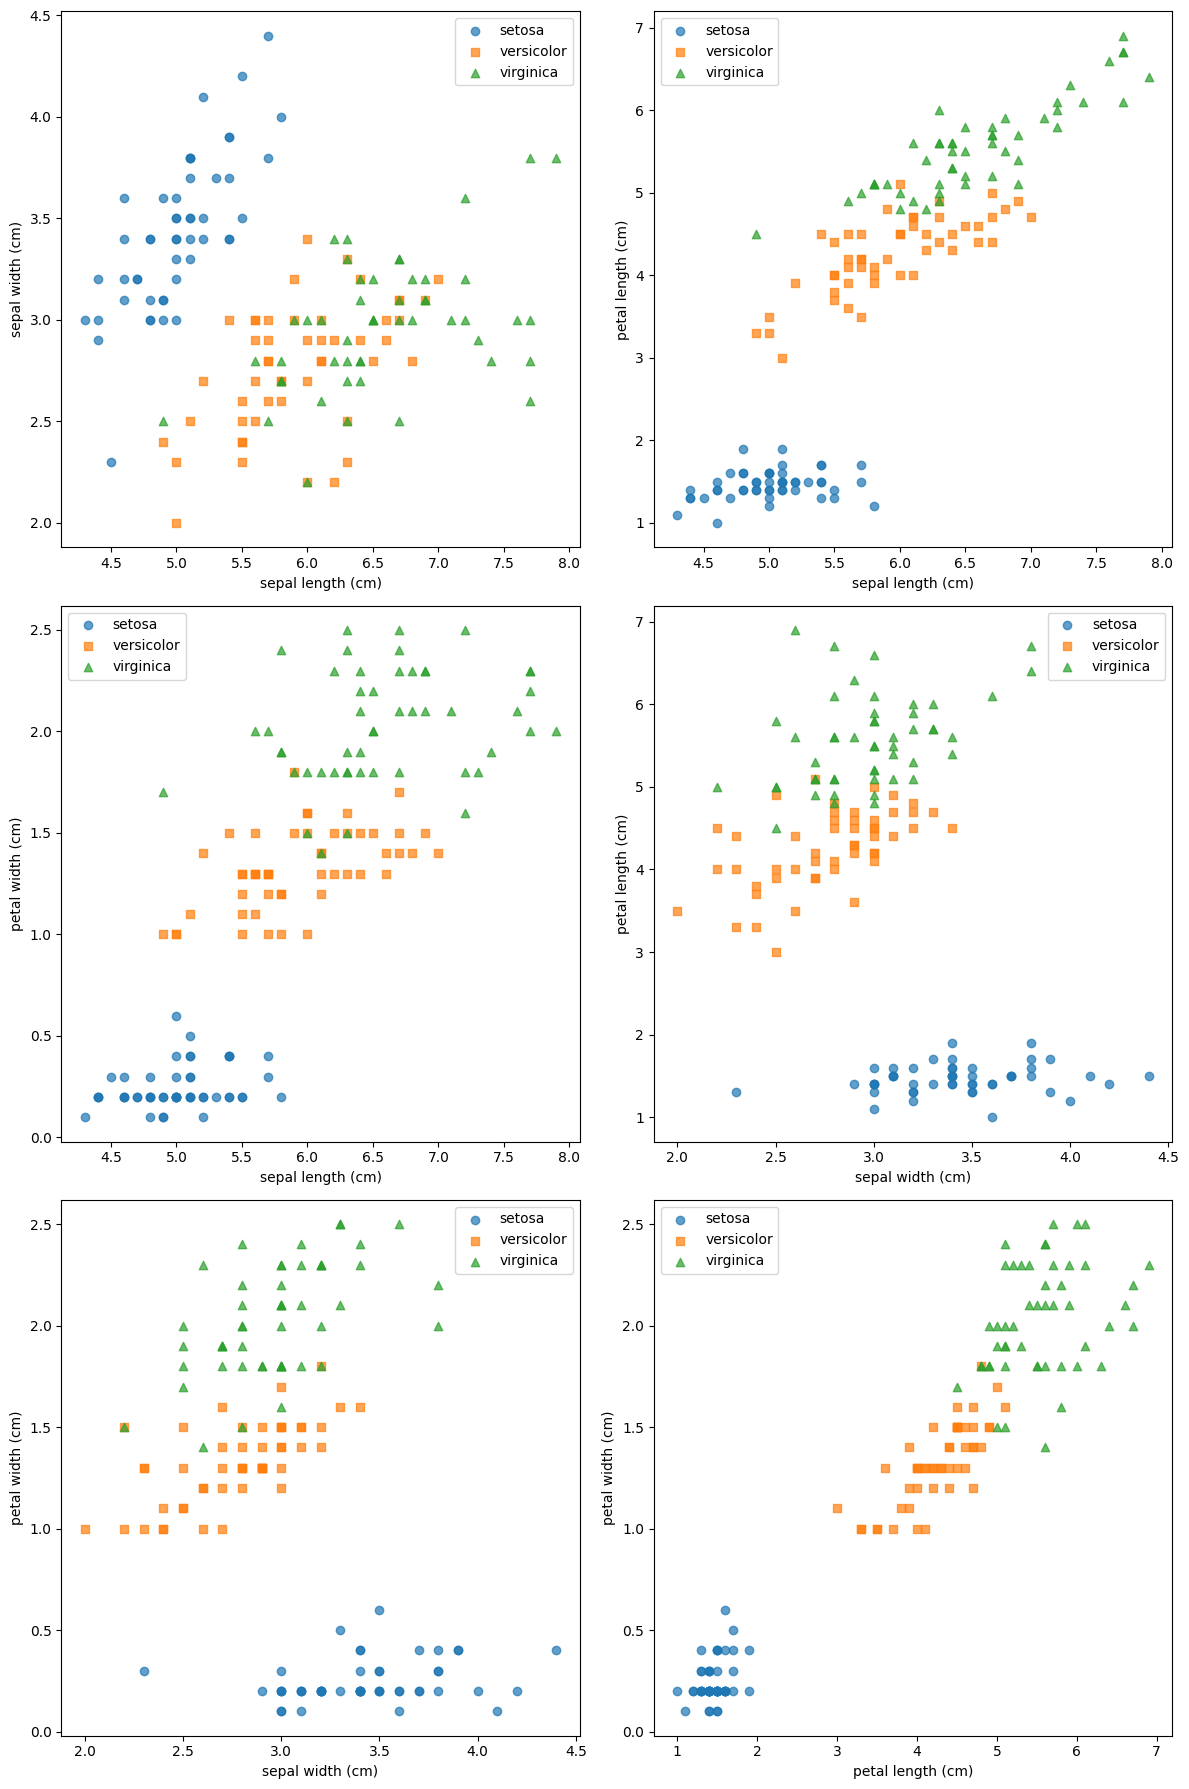

In [27]:

df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
df['species'] = iris_dataset.target


# Map species to names
species_map = {i: name for i, name in enumerate(iris_dataset.target_names)}
df['species'] = df['species'].map(species_map)


# Define markers for different species
markers = ['o', 's', '^']

# Create scatter plots for all possible feature combinations
feature_combinations = list(itertools.combinations(iris_dataset.feature_names, 2))

# Plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))
axes = axes.flatten()


for i, (feature_x, feature_y) in enumerate(feature_combinations):
    ax = axes[i]
    for j, (species, marker) in enumerate(zip(species_map.values(), markers)):
        subset = df[df['species'] == species]
        ax.scatter(subset[feature_x], subset[feature_y], label=species, marker=marker, alpha=0.7)

    

    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)
    ax.legend()



plt.tight_layout()
plt.show()

##### 3d plot:

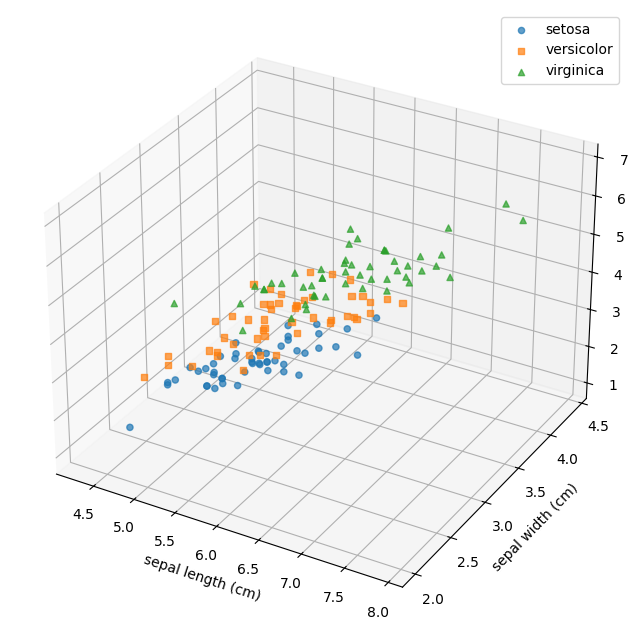

In [29]:
# Select three features for the 3D plot
feature_x, feature_y, feature_z = iris_dataset.feature_names[:3]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each species with a different marker and color
for species, marker in zip(species_map.values(), markers):
    subset = df[df['species'] == species]
    ax.scatter(subset[feature_x], subset[feature_y], subset[feature_z], label=species, marker=marker, alpha=0.7)

# Set axis labels
ax.set_xlabel(feature_x)
ax.set_ylabel(feature_y)
ax.set_zlabel(feature_z)
ax.legend()

plt.show()
